**NOTE** 
This notebook was only designed to be ran on google colab, implementing colab files to import the data.

Attempting to run this outside of colab may result in errors, as it has not been tested anywhere else.

In [ ]:
# install package requirements for program
!pip install transformers
!pip install datasets
!pip install numpy
!pip install pandas
!pip install tensorflow-gpu
!pip install sklearn

     |████████████████████████████████| 2.5MB 33.1MB/s 
     |████████████████████████████████| 901kB 31.7MB/s 
     |████████████████████████████████| 3.3MB 34.2MB/s 
     |████████████████████████████████| 245kB 29.3MB/s 
     |████████████████████████████████| 122kB 38.8MB/s 
     |████████████████████████████████| 245kB 39.9MB/s 
     |████████████████████████████████| 454.3MB 34kB/s 


In [ ]:
from transformers import AutoTokenizer
from datasets import Dataset
import numpy as np
import pandas as pd
import tensorflow as tf
import requests
import io
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import io

train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_df = pd.read_csv(io.BytesIO(uploaded['test.csv']))

**data Description**


*   id
*   premise
*   hypothesis
*   lang_abv
*   language
*   label



In [ ]:
print(train_df.loc[0])

id                                                   5130fd2cb5
premise       and these comments were considered in formulat...
hypothesis    The rules developed in the interim were put to...
lang_abv                                                     en
language                                                English
label                                                         0
Name: 0, dtype: object


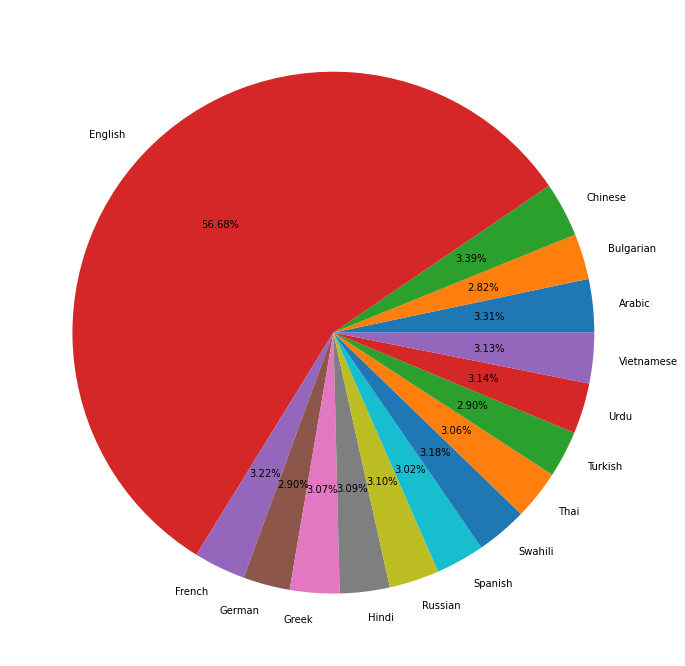

In [ ]:
train_labels, train_frequencies = np.unique(train_df.language.values, return_counts = True)
plt.figure(figsize = (12,12))
plt.pie(train_frequencies,labels = train_labels, autopct = '%1.2f%%')
plt.show()

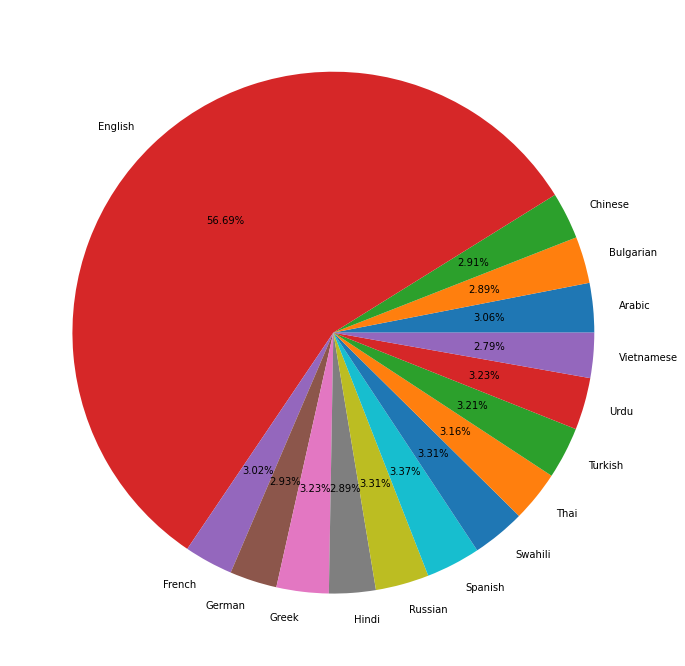

In [ ]:
test_labels, test_frequencies = np.unique(test_df.language.values, return_counts = True)
plt.figure(figsize = (12,12))
plt.pie(test_frequencies,labels = test_labels, autopct = '%1.2f%%')
plt.show()

In [ ]:
print("total: " + str(np.sum(train_frequencies)))
for i in range(len(train_labels)):
  print(train_labels[i] + ": " + str(train_frequencies[i]))

total: 12120
Arabic: 401
Bulgarian: 342
Chinese: 411
English: 6870
French: 390
German: 351
Greek: 372
Hindi: 374
Russian: 376
Spanish: 366
Swahili: 385
Thai: 371
Turkish: 351
Urdu: 381
Vietnamese: 379


In [ ]:
print("total: " + str(np.sum(test_frequencies)))
for i in range(len(test_labels)):
  print(train_labels[i] + ": " + str(test_frequencies[i]))

total: 5195
Arabic: 159
Bulgarian: 150
Chinese: 151
English: 2945
French: 157
German: 152
Greek: 168
Hindi: 150
Russian: 172
Spanish: 175
Swahili: 172
Thai: 164
Turkish: 167
Urdu: 168
Vietnamese: 145


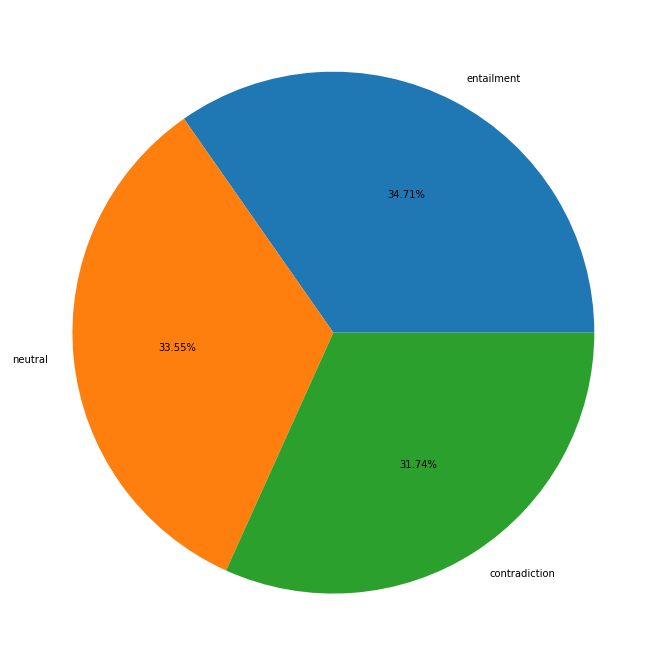

In [ ]:
label_names = ["entailment","neutral","contradiction"]
label_percents = [0.34706,0.33551,0.31742]

plt.figure(figsize = (12,12))
plt.pie(label_percents, labels=label_names, autopct = '%1.2f%%')
plt.show()

In [ ]:
# select model and initialise the tokenizer
model_name = 'bert-base-multilingual-cased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

#create the Dataset version of the pandas frames
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# use tokenizer to get trainset input sequences
train_encodings = tokenizer(train_dataset['premise'],
                            train_dataset['hypothesis'],
                            return_token_type_ids=True,
                           return_attention_mask=True
                            )

# demonstrate the decoded output of the tokenizer
decoded = tokenizer.decode(train_encodings["input_ids"][0])
print(decoded)

# use the tokenizer to get the test set input sequences
test_encodings = tokenizer(test_dataset['premise'],
                           test_dataset['hypothesis'],
                           return_token_type_ids=True,
                           return_attention_mask=True
                           )


[CLS] and these comments were considered in formulating the interim rules. [SEP] The rules developed in the interim were put together with these comments in mind. [SEP]


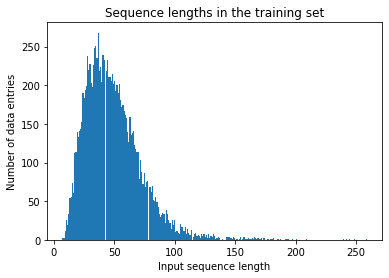

259


In [ ]:
train_lengths = train_encodings['input_ids']

lengths = []
for i in range (len(train_lengths)):
  lengths.append(len(train_lengths[i]))

bin_num = lengths[np.argmax(lengths)]

plt.hist(lengths, bins=bin_num)
plt.ylabel('Number of data entries')
plt.xlabel('Input sequence length')
plt.title("Sequence lengths in the training set")

plt.show()
print(bin_num)

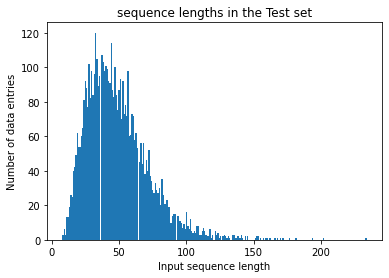

234


In [ ]:
test_lengths = test_encodings['input_ids']

lengths = []
for i in range (len(test_lengths)):
  lengths.append(len(test_lengths[i]))

bin_num = lengths[np.argmax(lengths)]

plt.hist(lengths, bins=bin_num)
plt.ylabel('Number of data entries')
plt.xlabel('Input sequence length')
plt.title("sequence lengths in the Test set")

plt.show()
print(bin_num)